In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [18]:
# Generate synthetic time series data
def generate_time_series(n, steps, freq):
    t = np.arange(0, steps, 1)
    time_series = np.sin(t * (2 * np.pi / freq)) + np.random.normal(scale=0.5, size=t.shape)
    plt.plot(t, time_series)
    return time_series

# Prepare the dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back)]
        X.append(a)
        y.append(data[i + look_back])
    return np.array(X), np.array(y)



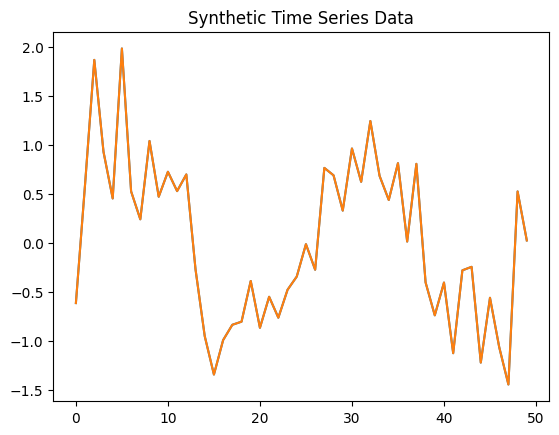

In [19]:
# Create a dataset
n_samples = 1000
time_steps = 50
freq = 25

data = generate_time_series(n_samples, time_steps, freq)
plt.plot(data)
plt.title('Synthetic Time Series Data')
plt.show()


In [20]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

# Split the dataset into training and testing sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size], data[train_size:len(data)]
print("train size:", train_size)
print("test size:", test_size)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

train size: 33
test size: 17


In [6]:

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

c:\Users\mhuzaifa\.conda\envs\RETFound\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
22/22 - 4s - 185ms/step - loss: 0.1159
Epoch 2/100
22/22 - 0s - 7ms/step - loss: 0.0720
Epoch 3/100
22/22 - 0s - 7ms/step - loss: 0.0707
Epoch 4/100
22/22 - 0s - 7ms/step - loss: 0.0737
Epoch 5/100
22/22 - 0s - 7ms/step - loss: 0.0656
Epoch 6/100
22/22 - 0s - 6ms/step - loss: 0.0684
Epoch 7/100
22/22 - 0s - 7ms/step - loss: 0.0709
Epoch 8/100
22/22 - 0s - 7ms/step - loss: 0.0685
Epoch 9/100
22/22 - 0s - 7ms/step - loss: 0.0610
Epoch 10/100
22/22 - 0s - 6ms/step - loss: 0.0566
Epoch 11/100
22/22 - 0s - 7ms/step - loss: 0.0545
Epoch 12/100
22/22 - 0s - 7ms/step - loss: 0.0539
Epoch 13/100
22/22 - 0s - 8ms/step - loss: 0.0553
Epoch 14/100
22/22 - 0s - 8ms/step - loss: 0.0550
Epoch 15/100
22/22 - 0s - 6ms/step - loss: 0.0558
Epoch 16/100
22/22 - 0s - 7ms/step - loss: 0.0590
Epoch 17/100
22/22 - 0s - 7ms/step - loss: 0.0519
Epoch 18/100
22/22 - 0s - 7ms/step - loss: 0.0518
Epoch 19/100
22/22 - 0s - 7ms/step - loss: 0.0480
Epoch 20/100
22/22 - 0s - 6ms/step - loss: 0.0477
Epoch 2

In [8]:

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# # Invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


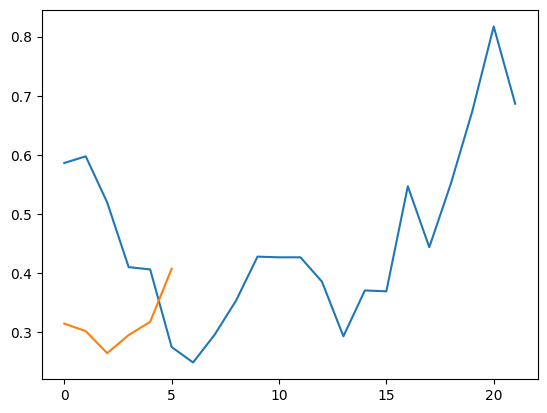

In [17]:
plt.plot(trainPredict)
plt.plot(testPredict)

In [14]:
print(trainY[0])
print(trainPredict[:,0])


[0.80231752]
[0.5860816  0.59734154 0.51918817 0.40966302 0.40586102 0.27439192
 0.24822196 0.2950663  0.35295466 0.4274444  0.42632806 0.4263414
 0.38514885 0.29259863 0.37018412 0.36874038 0.54661024 0.44345444
 0.5505572  0.67333996 0.8172733  0.68650115]


In [10]:
# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print(f'Train Score: {trainScore:.2f} RMSE')
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print(f'Test Score: {testScore:.2f} RMSE')


ValueError: Found input variables with inconsistent numbers of samples: [1, 22]

In [9]:



# Shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(data) - 1, :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [1, 22]